## Decision Trees

**Objective**: This notebook follows the workflow from the logistic regression notebook to analyse customer reviews using Decision Tree classifiers to predict certain outcomes based on the text data. The goal is to understand the sentiment or other characteristics of the reviews that could be beneficial for business insights.

**Methodology**: We have employed A Grid search to find the optimal setup for a Decision Tree on both the balanced and unbalanced data. 

**Data**: The analysis uses a dataset of customer reviews that has been preprocessed and vectorized. The dataset was split into training and testing sets, with downsampling applied to address class imbalance, ensuring that our model is robust and less biased. I run the optimisation on each dataset and compare the results.

**Key Findings**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, auc


## Decision trees on the vectorized reviews
I will first downsample the train data as before, then optimize a decision tree model on the unbalanced data first, then the balanced data with a downsampled majority class and finally compare the results.

In [2]:
# reading in the data
df = pd.read_pickle("../data/reviews_vector_2grams.pkl")

In [3]:
df.duplicated().sum()

0

In [4]:
# test train split before doing the downsampling
X=df[df.columns[4:]]
y=df["binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
X.duplicated().sum()

472975

In [6]:
# function which downsamples the majority class in a dataframe
def downsample_binary(y_train_in, X_train_in, min = 0, maj=1):
    # combine x and y
    data = pd.concat([y_train_in, X_train_in], axis=1)
    target_name = data.columns[0]
    
    # count the instances of the minority class
    minority_count = data[data[target_name] == min].shape[0]
    
    # random sample from the majority class
    majority_sample = data[data[target_name] == maj].sample(n=minority_count, random_state=42)
    
    # merge together
    balanced_df = pd.concat([data[data[target_name] == min], majority_sample])
    
    # Shuffle
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

balanced_set = downsample_binary(y_train, X_train)

In [7]:
balanced_set.duplicated().sum()

173330

In [8]:
# balanced data training split
X_train_bal = balanced_set.drop("binary", axis=1)
y_train_bal = balanced_set["binary"]


Now we can scale the data we have. We use seperate StandardScalers for each dataset. We will use the scaled data in the model evaluation phase.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [10]:
scaler_bal = StandardScaler()
scaler_bal.fit(X_train_bal)
X_train_transformed_bal = scaler_bal.transform(X_train_bal)
X_test_transformed_bal = scaler_bal.transform(X_test)

### Optimizing a Decision Tree Classifier on the original unbalanced data

I will use a grid search to find the best combination of:
- criterion: gini, entropy, (log_loss)
- max_depth
- min_samples_split
- min_samples_leaf
- max_features


In [22]:
estimators = [('normalise', StandardScaler()),
              ('model', DecisionTreeClassifier(random_state=12))]


pipe = Pipeline(estimators, verbose = True)



[Pipeline] ......... (step 1 of 2) Processing normalise, total=   2.9s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.9min


Pipeline(steps=[('normalise', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=12))],
         verbose=True)

In [30]:

params = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [5,10,15],
    'model__min_samples_leaf': [3,5]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search = GridSearchCV(pipe, param_grid=params, verbose=3, n_jobs=2)

In [ ]:
fitted_tree = grid_search.fit(X_train, y_train)

In [ ]:
fitted_tree.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_leaf=3, random_state=12))],
         verbose=True)

In [31]:

params2 = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [15,25],
    'model__min_samples_leaf': [3,5]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search2 = GridSearchCV(pipe, param_grid=params2, verbose=3, n_jobs=2)

In [ ]:
fitted_tree2 = grid_search2.fit(X_train,y_train)

In [34]:
print(fitted_tree2.best_estimator_)

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                        min_samples_leaf=5, random_state=12))],
         verbose=True)


In [40]:

params3 = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [25,50],
    'model__min_samples_leaf': [5,10]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search3 = GridSearchCV(pipe, param_grid=params2, verbose=3, n_jobs=2)

In [ ]:
fitted_tree3 = grid_search3.fit(X_train,y_train)

In [42]:
fitted_tree3.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                        min_samples_leaf=5, random_state=12))],
         verbose=True)

In [54]:

params3 = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [24,25,26],
    'model__min_samples_leaf': [5]    
}

grid_search4 = GridSearchCV(pipe, param_grid=params2, verbose=3, n_jobs=2)

In [ ]:
fitted_tree4 = grid_search4.fit(X_train, y_train)


In [56]:
fitted_tree4.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                        min_samples_leaf=5, random_state=12))],
         verbose=True)

In [11]:
estimators= [('normalise', StandardScaler()),
              ('model', DecisionTreeClassifier(max_depth=25, criterion="entropy", min_samples_leaf=5,random_state=12))]
pipe_final = Pipeline(estimators, verbose = True)

pipe_final.fit(X_train, y_train)

[Pipeline] ......... (step 1 of 2) Processing normalise, total=   1.6s
[Pipeline] ............. (step 2 of 2) Processing model, total=  18.0s


Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                        min_samples_leaf=5, random_state=12))],
         verbose=True)

### Optimizing a Decision Tree Classifier on the balanced data
Using the data with randomly downsampled majority class
I will use a grid search to find the best combination of:
- max_depth
- min_samples_split
- min_samples_leaf - turns out to be default


In [18]:
estimators_bal = [('normalise', StandardScaler()),
              ('model', DecisionTreeClassifier(random_state=12))]
pipe_bal = Pipeline(estimators_bal)


In [75]:

params_bal = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [5,10,15],
    'model__min_samples_leaf': [3,5]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search_bal = GridSearchCV(pipe_bal, param_grid=params_bal, verbose=3, n_jobs=2)

In [ ]:
fitted_tree_bal = grid_search_bal.fit(X_train_bal, y_train_bal)

In [69]:
fitted_tree_bal.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_leaf=5, random_state=12))])

In [73]:

params_bal2 = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [15,20,25,30],
    'model__min_samples_leaf': [5]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search_bal2 = GridSearchCV(pipe_bal, param_grid=params_bal, verbose=3, n_jobs=2)

In [ ]:
fitted_tree_bal2 = grid_search_bal2.fit(X_train_bal, y_train_bal)

In [76]:
fitted_tree_bal2.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        min_samples_leaf=5, random_state=12))])

In [85]:

params_bal3 = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__random_state':[12],
    'model__max_depth': [30,32],
    'model__min_samples_leaf': [5]
    # 'model__min_samples_split':[5,10],

    
    
}

grid_search_bal3 = GridSearchCV(pipe_bal, param_grid=params_bal, verbose=3, n_jobs=2)

In [86]:
fitted_tree_bal3 = grid_search_bal3.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 2/5] END model__criterion=entropy, model__max_depth=30, model__min_samples_leaf=5, model__random_state=12, normalise=StandardScaler();, score=0.752 total time=  17.5s
[CV 1/5] END model__criterion=entropy, model__max_depth=30, model__min_samples_leaf=5, model__random_state=12, normalise=StandardScaler();, score=0.752 total time=  17.6s
[CV 3/5] END model__criterion=entropy, model__max_depth=30, model__min_samples_leaf=5, model__random_state=12, normalise=StandardScaler();, score=0.752 total time=  17.3s
[CV 4/5] END model__criterion=entropy, model__max_depth=30, model__min_samples_leaf=5, model__random_state=12, normalise=StandardScaler();, score=0.750 total time=  17.2s
[CV 5/5] END model__criterion=entropy, model__max_depth=30, model__min_samples_leaf=5, model__random_state=12, normalise=StandardScaler();, score=0.750 total time=  16.9s
[CV 1/5] END model__criterion=entropy, model__max_depth=40, model__min_samples_leaf=5

In [87]:
fitted_tree_bal3.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        min_samples_leaf=5, random_state=12))])

In [12]:
estimators_final_bal= [('normalise', StandardScaler()),
              ('model', DecisionTreeClassifier(max_depth=30, criterion="entropy", min_samples_leaf=5,random_state=12))]
pipe_final_bal = Pipeline(estimators_final_bal, verbose = True)

pipe_final_bal.fit(X_train_bal, y_train_bal)

[Pipeline] ......... (step 1 of 2) Processing normalise, total=   0.6s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.0s


Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        min_samples_leaf=5, random_state=12))],
         verbose=True)

We now have ```pipe_final``` on the unbalanced data and ```pipe_final_bal``` on the balanced data. We can now compare the two.

In [13]:
y_train_predicted = pipe_final.predict(X_train_transformed)
y_test_predicted = pipe_final.predict(X_test_transformed)
train_acc_unbal = accuracy_score(y_train, y_train_predicted)
test_acc_unbal= accuracy_score(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.11      0.19     34434
           1       0.78      0.99      0.87    109124

    accuracy                           0.78    143558
   macro avg       0.79      0.55      0.53    143558
weighted avg       0.78      0.78      0.71    143558



In [14]:
y_train_predicted_bal = pipe_final_bal.predict(X_train_transformed_bal)
y_test_predicted_bal = pipe_final_bal.predict(X_test_transformed_bal)
train_acc_bal = accuracy_score(y_train_bal, y_train_predicted_bal)
test_acc_bal= accuracy_score(y_test, y_test_predicted_bal)
print(classification_report(y_test, y_test_predicted_bal))

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.95      0.45     34434
           1       0.94      0.28      0.43    109124

    accuracy                           0.44    143558
   macro avg       0.62      0.61      0.44    143558
weighted avg       0.79      0.44      0.43    143558



In [15]:
# for ROC later
y_proba_test = pipe_final.predict_proba(X_test_transformed)
y_proba_test_bal = pipe_final_bal.predict_proba(X_test_transformed_bal)

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# normal
cm_unbal = confusion_matrix(y_test, y_test_predicted)

In [17]:
# downsampled
cm_bal = confusion_matrix(y_test, y_test_predicted_bal)

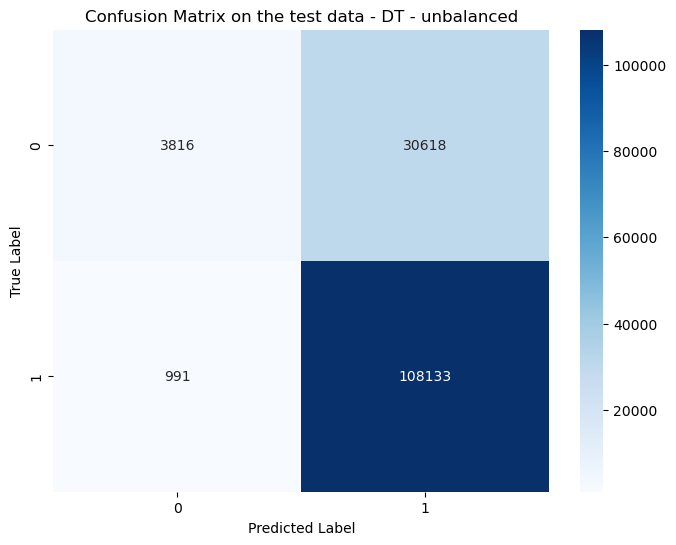

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - DT - unbalanced")
plt.show()

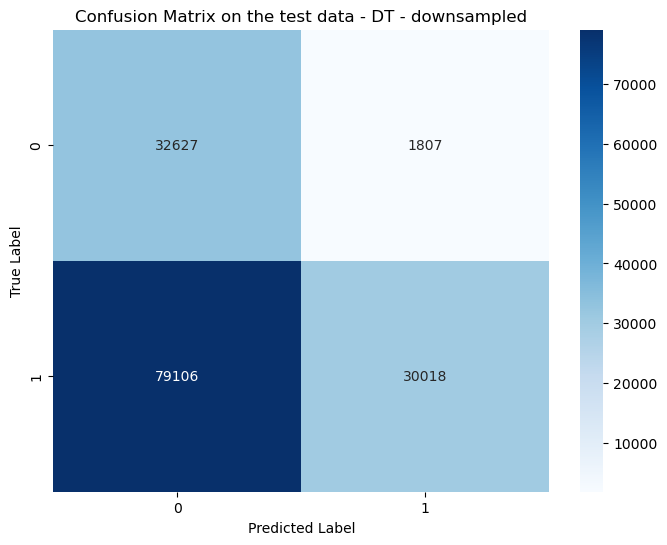

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - DT - downsampled")
plt.show()

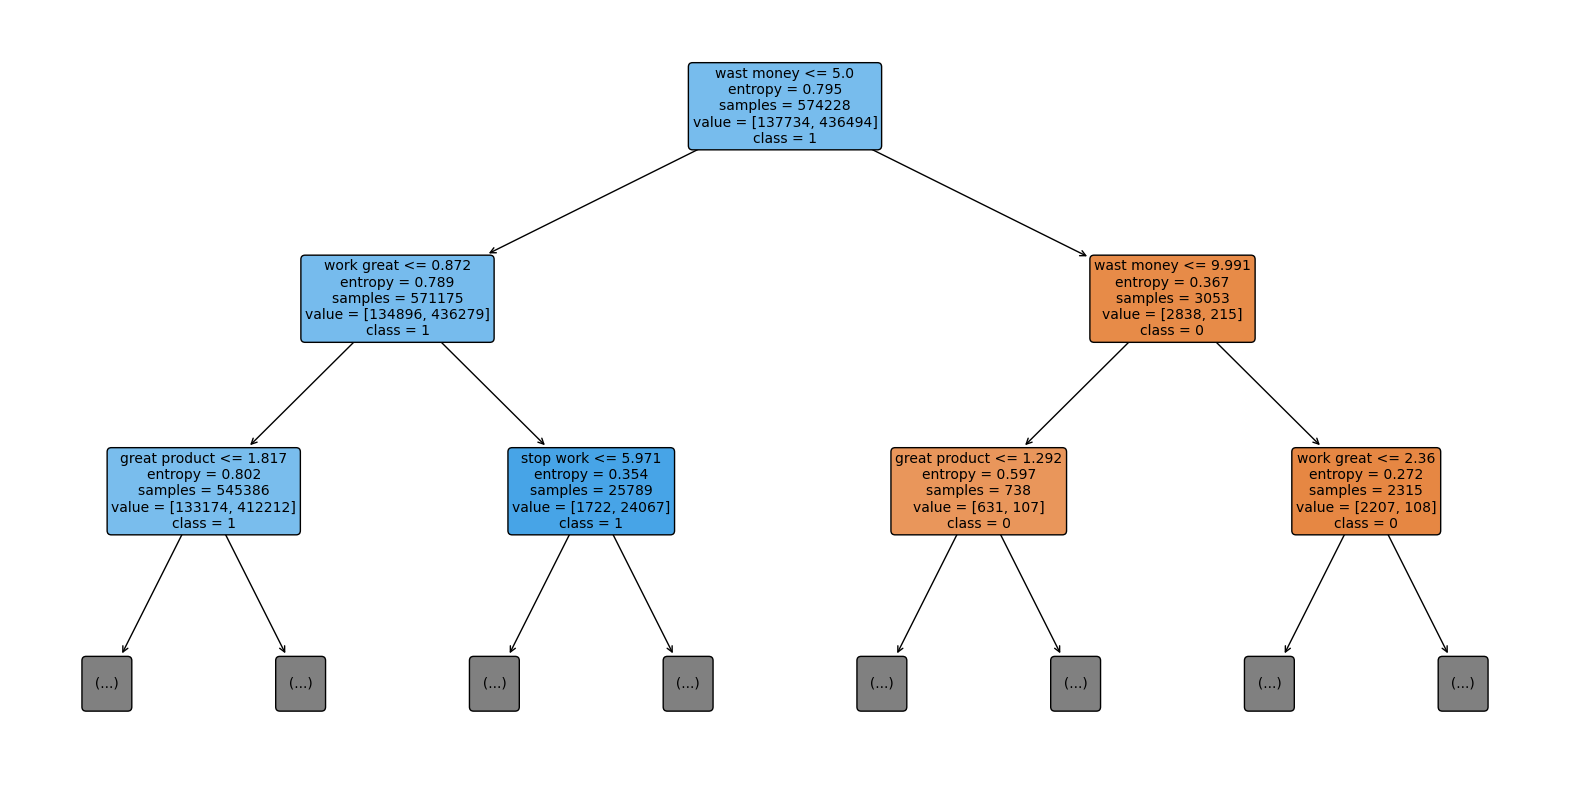

In [20]:
# retrieve the decision tree classifier from the pipeline
decision_tree_classifier = pipe_final[-1]

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, max_depth=2, filled=True, feature_names=list(X_train.columns), class_names=["0","1"], rounded=True)
plt.show()

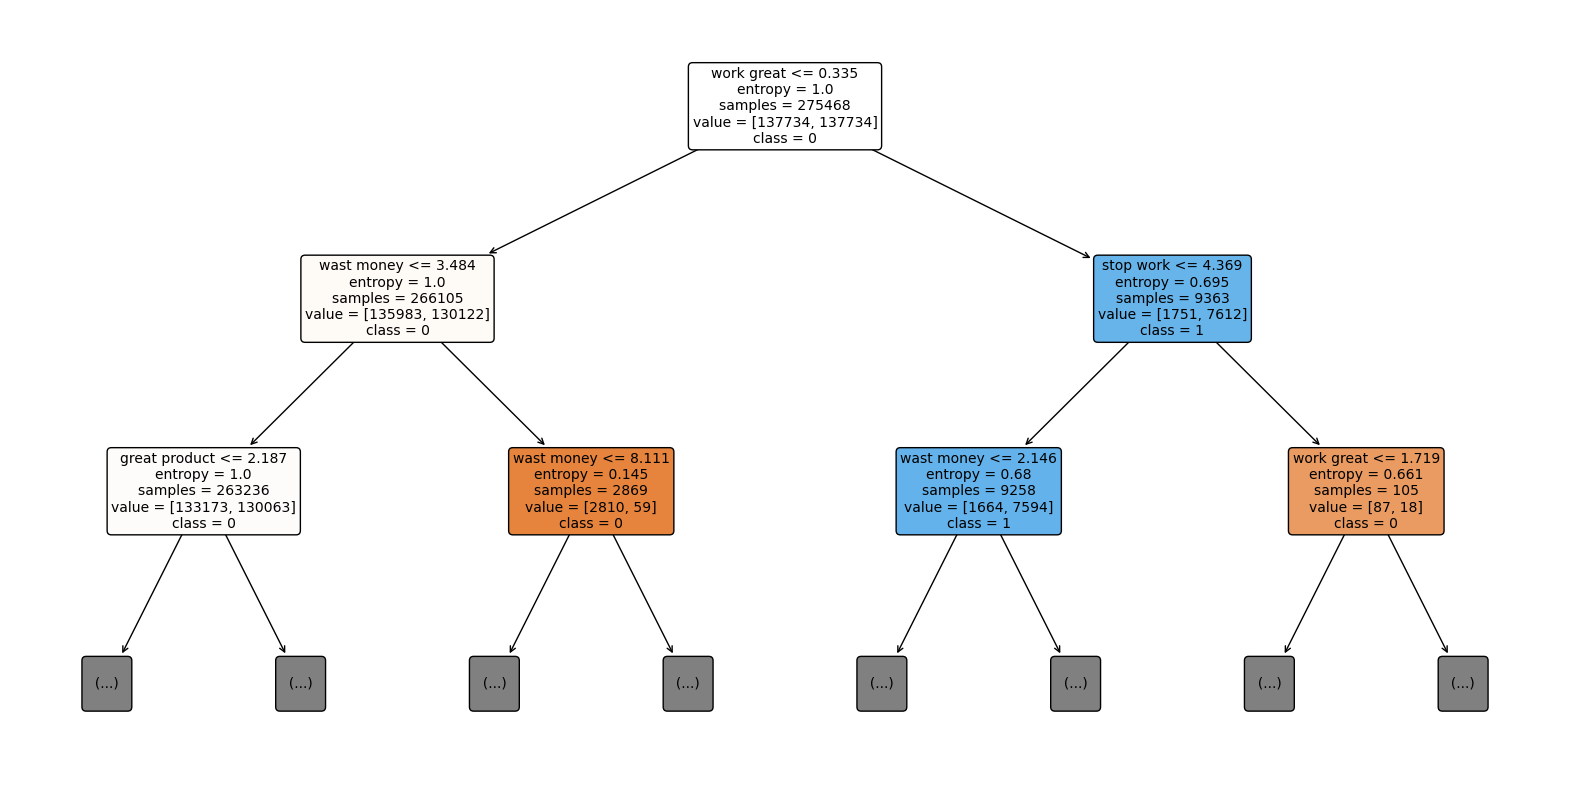

In [21]:
# retrieve the decision tree classifier from the pipeline
decision_tree_classifier_bal = pipe_final_bal[-1]

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier_bal, max_depth=2, filled=True, feature_names=list(X_train.columns), class_names=["0","1"], rounded=True)
plt.show()

In [22]:
fpr_unbal, tpr_unbal, thresholds_unbal = roc_curve(y_test.values,y_proba_test[:,1])
roc_auc1 = auc(fpr_unbal, tpr_unbal)
display1 = RocCurveDisplay(fpr=fpr_unbal, tpr=tpr_unbal, roc_auc=roc_auc1, estimator_name='Unbalanced LogReg')

In [23]:
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test.values,y_proba_test_bal[:,1])
roc_auc2 = auc(fpr_bal, tpr_bal)
display2 = RocCurveDisplay(fpr=fpr_bal, tpr=tpr_bal, roc_auc=roc_auc2, estimator_name='Balanced LogReg')

In [24]:
We can see how the ROC changes as we change the confidence thresehold. It shows we could try vary it and compare.

SyntaxError: invalid syntax (1198975984.py, line 1)

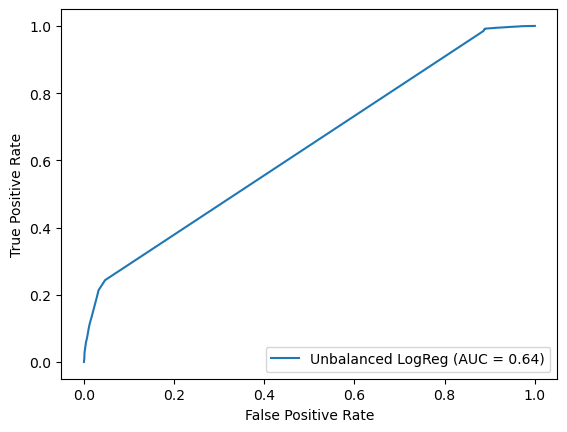

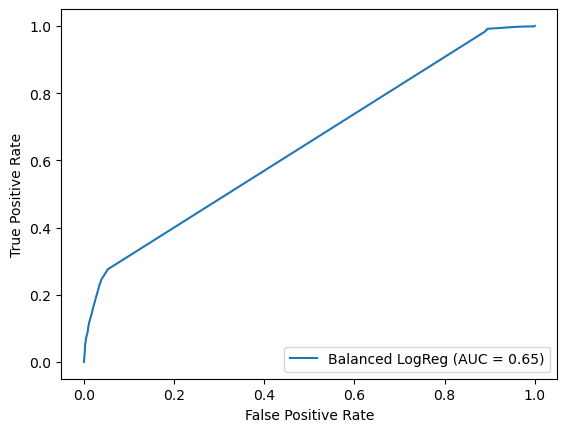

In [25]:
display1.plot()
display2.plot()
plt.show()

In [26]:
y_pred_baseline= decision_tree_classifier.predict(scaler.transform(df[df.columns[4:]]))

incorrect_guesses = df["binary"] != y_pred_baseline
incorrect_v = pd.Series(y_pred_baseline)[incorrect_guesses]
ig = pd.concat([pd.Series(incorrect_v),df[incorrect_guesses]], axis=1)


In [27]:
rev = ig.loc[3]
text = rev["reviewText"]
print(f"Actual: {rev['binary']}, Guess: {rev[0]}, Overall: {int(rev['overall'])}")
print(f"Review: {text[:47]} \n{text[47: ]}")

Actual: 0, Guess: 1, Overall: 2
Review: DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY  
WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.


In [28]:
feature_values = scaler.transform(ig.loc[3, ig.columns[5:]].values.reshape(1, -1))
fi = decision_tree_classifier.feature_importances_
fi.reshape(1,-1).shape

feature_imp = pd.DataFrame(fi.reshape(1,-1), columns=ig.columns[5:], index=['Importances']).T
sorted_imp = feature_imp.sort_values(by='Importances', ascending=False)

print(sorted_imp.head(10))

                  Importances
wast money           0.103586
work great           0.084598
great product        0.061021
highli recommend     0.060333
love case            0.049480
stop work            0.048685
great case           0.045959
doesnt fit           0.042280
didnt work           0.037494
doesnt work          0.037371


/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We see that this model is harder to interpret. It is looking for how the top words are weighed even though they don't appear in the review. So the scores for all these words would be 0 but it takes a while til it gets further in the tree. It seems it struggles with this task.